In [1]:
import warnings
warnings.filterwarnings('ignore')
from popsycle import synthetic
from popsycle import utils
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In additional to the usual python/astropy things, you'll need to install Galaxia, PyPopStar, PopSyCLE.
For PyPopStar, it goes faster once you've made isochrones.
Same goes from PopSyCLE with the initial-final cluster mass ratio file.

# Galaxia

This is where you generate the stellar model and set the survey direction and area.

Galaxia requires a text file containing the parameters you want for the model,
following the format given in the Galaxia example. That file can either be 
generated by hand, or with the `write_galaxia_params` function. 

To create the file `example_galaxia_params.txt`, run:


In [2]:
synthetic.write_galaxia_params(output_root = 'example',
                               longitude = 1.25,
                               latitude = -2.65,
                               area = 0.001)

** Generating example_galaxia_params.txt **
-- outputFile example
-- outputDir ./
-- photoSys UBV
-- magcolorNames V,B-V
-- appMagLimits[0] -1000
-- appMagLimits[1] 1000
-- absMagLimits[0] -1000
-- absMagLimits[1] 1000
-- colorLimits[0] -1000
-- colorLimits[1] 1000
-- geometryOption 1
-- longitude 1.250000
-- latitude -2.650000
-- surveyArea 0.00100
-- fSample 1
-- popID -1
-- warpFlareOn 1
-- seed 92
-- r_max 30
-- starType 0
-- photoError 0



Then create the stellar model, 
by running `galaxia -r example_galaxia_params.txt` on the command line. 
PopSyCLE can also combine these two steps by executing:


In [5]:
synthetic.run_galaxia(output_root = 'example',
                      longitude = 1.25,
                      latitude = -2.65,
                      area = 0.001,
                      galaxia_galaxy_model_filename= '/g/lu/code/galaxia/docs/galaxyModelParams_PopSyCLEv3.txt')

** Generating example_galaxia_params.txt **
-- outputFile example
-- outputDir ./
-- photoSys UBV
-- magcolorNames V,B-V
-- appMagLimits[0] -1000
-- appMagLimits[1] 1000
-- absMagLimits[0] -1000
-- absMagLimits[1] 1000
-- colorLimits[0] -1000
-- colorLimits[1] 1000
-- geometryOption 1
-- longitude 1.250000
-- latitude -2.650000
-- surveyArea 0.00100
-- fSample 1
-- popID -1
-- warpFlareOn 1
-- seed 97
-- r_max 30
-- starType 0
-- photoError 0
** Executing Galaxia with example_galaxia_params.txt and /g/lu/code/galaxia/docs/galaxyModelParams_PopSyCLEv3.txt **
** STDOUT **
Reading Parameter file-             /g/lu/code/galaxia/docs/galaxyModelParams_PopSyCLEv3.txt
--------------------------------------------------------
GalaxiaData              /g/lu/code/galaxia/GalaxiaData_v3
bulge_Rc                 2.54                    
bulge_x0                 0.70                    
bulge_y0                 0.424                   
bulge_z0                 0.424                   
bulge_alpha   

 
The results should look like this:



CODEDATAPATH=/u/casey_lam/scratch/GalaxiaData/

Reading Parameter file-             example_galaxia_params.txt
___

outputFile               example                 
outputDir                ./                      
photoSys                 UBV                     
magcolorNames            V,B-V                   
appMagLimits[0]          -1000                   
appMagLimits[1]          1000                    
absMagLimits[0]          -1000                   
absMagLimits[1]          1000                    
colorLimits[0]           -1000                   
colorLimits[1]           1000                    
geometryOption           1                       
longitude                1.25                    
latitude                 -2.65                   
surveyArea               0.001                   
fSample                  1                       
popID                    -1                      
warpFlareOn              1                       
seed                     12                      
r_max                    20                      
starType                 0                       
photoError               0                       
___
Reading tabulated values from file- /u/casey_lam/scratch/GalaxiaData/Model/vcirc.dat
Using geometry:                     Patch at l ,b : (1.25 -2.65) d_theta=0.0178412
Reading Isochrones from dir-        /u/casey_lam/scratch/GalaxiaData/Isochrones/padova/UBV
Isochrone Grid Size:                (Age bins=182,Feh bins=34,Alpha bins=1)
Time Isocrhone Reading              2.73553     
Generating populations................
___
Thin Disk,ID=0:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_0_E1.ebf
Time Tree generation/reading =      1.34589     
Completed % <0..10..20..30..40..50..60..70..80..90..>
Stars spawned =                     15          
Time Spawning=                      0.519746    
___
Thin Disk,ID=1:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_1_E1.ebf
Time Tree generation/reading =      0.894184    
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     785         
Time Spawning=                      3.01123     
___
Thin Disk,ID=2:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_2_E1.ebf
Time Tree generation/reading =      1.21969     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     2304        
Time Spawning=                      2.31239     
___
Thin Disk,ID=3:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_3_E1.ebf
Time Tree generation/reading =      1.12221     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     3299        
Time Spawning=                      2.63636     
___
Thin Disk,ID=4:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_4_E1.ebf
Time Tree generation/reading =      1.12869     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     9040        
Time Spawning=                      5.16435     
___
Thin Disk,ID=5:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_5_E1.ebf
Time Tree generation/reading =      0.924357    
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     9983        
Time Spawning=                      5.99943     
___
Thin Disk,ID=6:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_6_E1.ebf
Time Tree generation/reading =      1.03473     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     11927       
Time Spawning=                      5.80737     
___
ThickDisk:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_7_E0.ebf
Time Tree generation/reading =      1.00016     
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     6561        
Time Spawning=                      1.83702     
___
Spheroid:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_8_E0.ebf
Time Tree generation/reading =      0.320754    
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     589         
Time Spawning=                      0.693446    
___
Bulge:
Reading tree from file-             /u/casey_lam/scratch/GalaxiaData/BHTree-2.2/bhtree_with_wf/bhtree_9_E0.ebf
Time Tree generation/reading =      1.0575      
Completed % <0..9..19..29..39..49..59..69..79..89..99..>
Stars spawned =                     620676      
Time Spawning=                      28.1113     
___
Total stars written                 665179                  
File written-                       .//example.ebf
Calulating magnitudes................
Reading Isochrones from dir-        /u/casey_lam/scratch/GalaxiaData/Isochrones/padova/UBV
Isochrone Grid Size:                (Age bins=182,Feh bins=34,Alpha bins=1)
Time Isocrhone Reading              2.67512     
Calulating Extinction................
Time for extinction calculation     0.876306    
Total Time=                         73.89 


# Population Synthesis

The stellar model now needs compact objects, which we inject with PopSyCLE. 
This produces an .h5 file with both stars and compact objects, sorted by latitude and longitude.
Here you can set the black hole and neutron star kick speeds.

In [6]:
synthetic.perform_pop_syn(ebf_file = 'example.ebf', 
                          output_root = 'example',
                          iso_dir = '/g/lu/models/PopSyCLE_isochrones',
                          bin_edges_number = None, 
                          BH_kick_speed_mean = 100, 
                          NS_kick_speed_mean = 350);

*********************** Starting popid 0
Starting age bin  7.309924602508545
Starting age bin  6.3
Starting age bin  7.0
Starting sub-bin  0
Starting age bin  7.7
Starting sub-bin  0
Starting age bin  8.0
Starting sub-bin  0
*********************** Starting popid 1
Starting age bin  8.1830472946167
Starting sub-bin  0
Starting age bin  8.389529981851577
Starting sub-bin  0
Starting age bin  8.596012669086456
Starting sub-bin  0
Found 2 stars out of mass range
Starting age bin  8.802495356321334
Starting sub-bin  0
Isochrone generation took 85.038135 s.
Making photometry for isochrone: log(t) = 8.91  AKs = 0.00  dist = 10
     Starting at:  2020-07-21 12:06:05.747778   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.107 Msun  T =  2931 K  m_ubv_U = 18.53
M =   1.310 Msun  T =  6685 K  m_ubv_U = 3.87
M =   2.220 Msun  T =  8163 K  m_ubv_U = 0.68
M =   2.233 Msun  T =  5080 K  m_ubv_U = 2.76
M =   2.246 Msun  T =  4541 K  

Found 40 stars out of mass range
Starting age bin  9.968774384737014
Starting sub-bin  0
Found 30 stars out of mass range
*********************** Starting popid 7
Starting age bin  9.94097840309143
Starting sub-bin  0
Found 160 stars out of mass range
*********************** Starting popid 8
Starting age bin  10.038501205444335
Starting sub-bin  0
Found 25 stars out of mass range
*********************** Starting popid 9
Starting age bin  9.9
Starting sub-bin  0
Found 9319 stars out of mass range
perform_pop_syn runtime : 240.679283 s
******************** INFO **********************
Total number of stars from Galaxia: 367329
Total number of compact objects made: 24441
Total number of things binned: 391770


# Finding microlensing events

Here is when all microlensing events are found.
You can set the survey duration, cadence, maximum impact parameter, blend radius.
This also has the option of being parallelizable.

In [7]:
synthetic.calc_events(hdf5_file = 'example.h5', 
                      output_root2 = 'example', 
                      radius_cut = 2, 
                      obs_time = 1000, 
                      n_obs = 11, 
                      theta_frac = 2, 
                      blend_rad = 0.65, 
                      overwrite = False, 
                      n_proc = 1)

Working on loop ll, bb =  0 0
Candidate events detected:  25
calc_events runtime : 17.051963 s


# Photometry

This is the last thing, where you choose the photometric band for the observations and the reddening law.
The final file of microlensing events is produced here as a .fits file.

In [8]:
synthetic.refine_events(input_root = 'example', 
                        filter_name = 'I',
                        photometric_system = 'ubv',
                        red_law = 'Damineli16', 
                        overwrite = False, 
                        output_file = 'default')

Original candidate events:  25
Candidate events in survey window:  24
refine_events runtime : 0.184144 s


# Things you can do with PopSyCLE

First, read in the table, and print out a list of all the possible keys:

In [11]:
t = Table.read('example_refined_events_ubv_I_Damineli16.fits')
print(t.colnames)

['zams_mass_L', 'mass_L', 'px_L', 'py_L', 'pz_L', 'vx_L', 'vy_L', 'vz_L', 'age_L', 'popid_L', 'exbv_L', 'glat_L', 'glon_L', 'mbol_L', 'grav_L', 'teff_L', 'feh_L', 'rad_L', 'rem_id_L', 'obj_id_L', 'ubv_J_L', 'ubv_H_L', 'ubv_K_L', 'ubv_U_L', 'ubv_I_L', 'ubv_B_L', 'ubv_V_L', 'ubv_R_L', 'vr_L', 'mu_b_L', 'mu_lcosb_L', 'zams_mass_S', 'mass_S', 'px_S', 'py_S', 'pz_S', 'vx_S', 'vy_S', 'vz_S', 'age_S', 'popid_S', 'exbv_S', 'glat_S', 'glon_S', 'mbol_S', 'grav_S', 'teff_S', 'feh_S', 'rad_S', 'rem_id_S', 'obj_id_S', 'ubv_J_S', 'ubv_H_S', 'ubv_K_S', 'ubv_U_S', 'ubv_I_S', 'ubv_B_S', 'ubv_V_S', 'ubv_R_S', 'vr_S', 'mu_b_S', 'mu_lcosb_S', 'theta_E', 'u0', 'mu_rel', 't0', 't_E', 'ubv_I_app_S', 'ubv_I_app_L', 'cent_glon_I_N', 'cent_glat_I_N', 'ubv_I_app_N', 'ubv_I_app_LSN', 'delta_m_I', 'f_blend_I', 'pi_rel', 'pi_E', 'pps_seed', 'gal_seed']


## Figure out how many events due to BH, NS, WD, star

In [12]:
bh_idx = np.where(t['rem_id_L'] == 103)[0]
ns_idx = np.where(t['rem_id_L'] == 102)[0]
wd_idx = np.where(t['rem_id_L'] == 101)[0]
st_idx = np.where(t['rem_id_L'] == 0)[0]
print('Number of BHs: ' + str(len(bh_idx)))
print('Number of NSs: ' + str(len(ns_idx)))
print('Number of WDs: ' + str(len(wd_idx)))
print('Number of stars: ' + str(len(st_idx)))

Number of BHs: 0
Number of NSs: 0
Number of WDs: 4
Number of stars: 20


## Histogram of tE

Text(0.5, 0, '$t_E$ (days)')

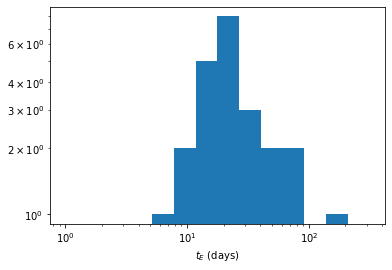

In [13]:
plt.hist(t['t_E'], bins = np.logspace(0, 2.5, 15))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t_E$ (days)')

## piE vs tE

Text(0, 0.5, '$\\pi_E$')

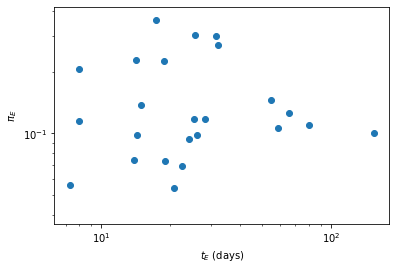

In [14]:
plt.scatter(t['t_E'], t['pi_E'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t_E$ (days)')
plt.ylabel('$\pi_E$')

## dL vs dS

Text(0, 0.5, '$d_S$ (kpc)')

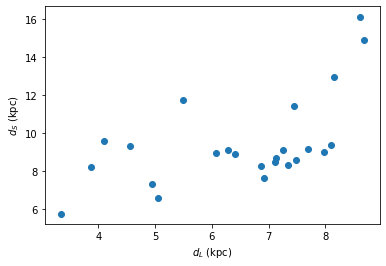

In [15]:
plt.scatter(t['rad_L'], t['rad_S'])
plt.xlabel('$d_L$ (kpc)')
plt.ylabel('$d_S$ (kpc)')